In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pathlib import Path

ROOT = Path.cwd().parent
PROC = ROOT / "data" / "processed"
df = pd.read_csv(PROC / "titanic_features.csv")

# select features
features = ["Pclass","Sex","Age","Fare","FamilySize","IsAlone"]
X = df[features]
y = df["Survived"]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458
[[90 15]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



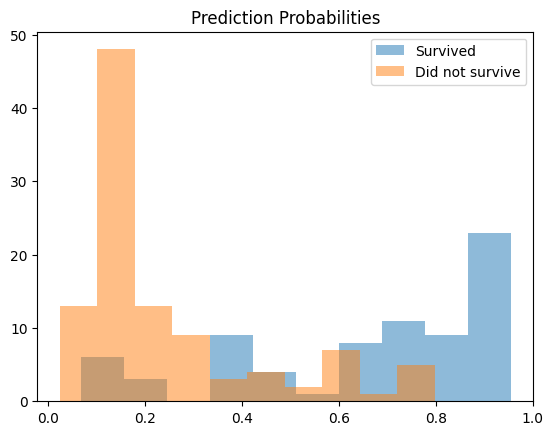

Bootstrap 95% CI: (np.float64(0.7374301675977654), np.float64(0.8547486033519553))


In [2]:
import seaborn as sns, matplotlib.pyplot as plt
import numpy as np

# residuals proxy: predicted probs vs actual
probs = model.predict_proba(X_test)[:,1]
plt.hist(probs[y_test==1], alpha=0.5, label="Survived")
plt.hist(probs[y_test==0], alpha=0.5, label="Did not survive")
plt.legend(); plt.title("Prediction Probabilities"); plt.show()

# bootstrap accuracy CI
n_boot = 1000
scores = []
rng = np.random.default_rng(42)
for _ in range(n_boot):
    idx = rng.choice(len(y_test), len(y_test), replace=True)
    scores.append(accuracy_score(y_test.iloc[idx], y_pred[idx]))
print("Bootstrap 95% CI:", (np.percentile(scores,2.5), np.percentile(scores,97.5)))
